Connected to Python 3.11.2

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from tqdm import tqdm
# from simul import *
initial_size=4

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
index = 25
# plt.imshow(train_x_orig[index])
# print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# print(train_x_orig)
# print(train_x_orig.shape)
train_x=train_x_orig.T
train_y=train_y.reshape((train_y.shape[0], 1))
# print("#############", train_y.shape)
train_y=train_y.T
# print(type(train_x_orig))
# print(train_y.shape)

# print(train_x_orig[2])

m_train = train_x_orig.shape[0]
# num_px = train_x_orig.shape[1]
print(train_y.shape)
# m_test = test_x_orig.shape[0]

(1, 10001)


In [3]:
# train_x=train_x_orig.reshape(train_x_orig.shape[0],-1).T
# test_x=test_x_orig.reshape(test_x_orig.shape[0],-1).T


# print ("train_x's shape: " + str(train_x.shape))
# print ("test_x's shape: " + str(test_x.shape))



n_x=4
n_h=7
n_y=1

layers_dims=(n_x, n_h, n_y)

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    grads={}
    costs=[]
    m=X.shape[1]
    n_x, n_h, n_y=layers_dims

    
    parameters=initialize_parameters(n_x, n_h, n_y)

    W1=parameters["W1"]
    W2=parameters["W2"]
    b1=parameters["b1"]
    b2=parameters["b2"]

    for i in range(num_iterations):
        A1, cache1= linear_activation_forward(X, W1, b1, "relu")
        A2, cache2= linear_activation_forward(A1, W2, b2, "sigmoid")

        cost=compute_cost(A2, Y)

        dA2= -(np.divide(Y,A2) - np.divide(1-Y,1-A2))

        dA1, dW2, db2= linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1= linear_activation_backward(dA1, cache1, "relu")

        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        parameters= update_parameters(parameters, grads, learning_rate)

        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

# parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 3000, print_cost=True)

  0%|          | 0/2000 [00:00<?, ?it/s]

Cost after iteration 0: 49.913170


  6%|▌         | 111/2000 [00:01<00:30, 62.66it/s]

Cost after iteration 100: 14.821863


 10%|█         | 209/2000 [00:03<00:27, 64.65it/s]

Cost after iteration 200: 10.168487


 16%|█▌        | 314/2000 [00:04<00:25, 65.19it/s]

Cost after iteration 300: 9.008349


 21%|██        | 412/2000 [00:06<00:23, 66.28it/s]

Cost after iteration 400: 9.239389


 26%|██▌       | 510/2000 [00:08<00:23, 63.13it/s]

Cost after iteration 500: 8.599761


 30%|███       | 608/2000 [00:09<00:21, 64.52it/s]

Cost after iteration 600: 7.320703


 36%|███▌      | 713/2000 [00:11<00:20, 64.18it/s]

Cost after iteration 700: 6.990363


 41%|████      | 811/2000 [00:12<00:18, 63.72it/s]

Cost after iteration 800: 6.716228


 45%|████▌     | 909/2000 [00:14<00:17, 63.37it/s]

Cost after iteration 900: 7.189160


 50%|█████     | 1007/2000 [00:15<00:15, 62.68it/s]

Cost after iteration 1000: 8.834197


 55%|█████▌    | 1107/2000 [00:17<00:13, 66.43it/s]

Cost after iteration 1100: 6.104906


 61%|██████    | 1212/2000 [00:19<00:12, 64.95it/s]

Cost after iteration 1200: 6.154410


 66%|██████▌   | 1310/2000 [00:20<00:10, 64.32it/s]

Cost after iteration 1300: 5.806734


 70%|███████   | 1410/2000 [00:22<00:09, 63.75it/s]

Cost after iteration 1400: 6.045208


 75%|███████▌  | 1509/2000 [00:23<00:07, 64.45it/s]

Cost after iteration 1500: 8.617330


 80%|████████  | 1609/2000 [00:25<00:06, 64.96it/s]

Cost after iteration 1600: 5.456294


 85%|████████▌ | 1709/2000 [00:26<00:04, 65.58it/s]

Cost after iteration 1700: 5.358014


 90%|█████████ | 1807/2000 [00:28<00:03, 63.85it/s]

Cost after iteration 1800: 5.266972


 96%|█████████▌| 1914/2000 [00:29<00:01, 66.96it/s]

Cost after iteration 1900: 5.182276


100%|██████████| 2000/2000 [00:31<00:00, 64.07it/s]


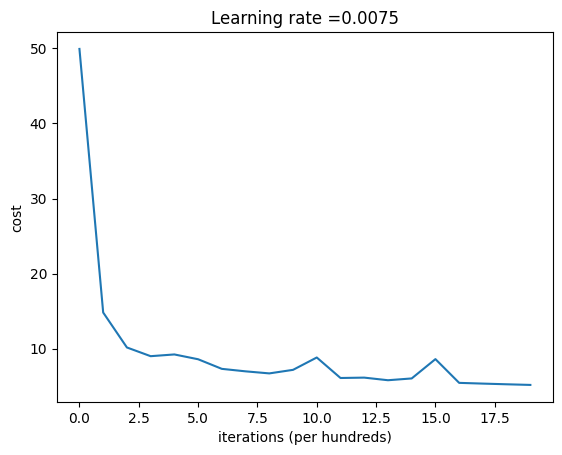

In [4]:
# predictions_train = predict(train_x, train_y, parameters)
# predictions_test = predict(test_x, test_y, parameters)


layers_dims = [initial_size, 25, 7, 5, 1]

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    costs=[]
    grads={}
    parameters=initialize_parameters_deep(layers_dims)

    for i in tqdm(range(num_iterations)):

        AL, caches=L_model_forward(X, parameters)

        cost=compute_cost(AL, Y, i)
        
        grads=L_model_backward(AL, Y, caches)

        parameters=update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate=0.0075, num_iterations = 2000, print_cost = True)


pred_train = predict(train_x, train_y, parameters)
# pred_test = predict(test_x, test_y, parameters)



# print_mislabeled_images(classes, test_x, test_y, pred_test)

No kernel connected